<a href="https://colab.research.google.com/github/grace-mariya/Data-Ai-Journey/blob/main/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**HOME VALUE PREDICTION - LINEAR REGRESSION PROJECT**

Import Libraries

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

Load Dataset

In [25]:
data=pd.read_csv('/content/drive/MyDrive/data/house_price_regression_dataset.csv')
print(data.info)


<bound method DataFrame.info of      Square_Footage  Num_Bedrooms  Num_Bathrooms  Year_Built  Lot_Size  \
0              1360             2              1        1981  0.599637   
1              4272             3              3        2016  4.753014   
2              3592             1              2        2016  3.634823   
3               966             1              2        1977  2.730667   
4              4926             2              1        1993  4.699073   
..              ...           ...            ...         ...       ...   
995            3261             4              1        1978  2.165110   
996            3179             1              2        1999  2.977123   
997            2606             4              2        1962  4.055067   
998            4723             5              2        1950  1.930921   
999            3268             4              2        1983  3.108790   

     Garage_Size  Neighborhood_Quality   House_Price  
0              0        

In [26]:
print(data.describe)


<bound method NDFrame.describe of      Square_Footage  Num_Bedrooms  Num_Bathrooms  Year_Built  Lot_Size  \
0              1360             2              1        1981  0.599637   
1              4272             3              3        2016  4.753014   
2              3592             1              2        2016  3.634823   
3               966             1              2        1977  2.730667   
4              4926             2              1        1993  4.699073   
..              ...           ...            ...         ...       ...   
995            3261             4              1        1978  2.165110   
996            3179             1              2        1999  2.977123   
997            2606             4              2        1962  4.055067   
998            4723             5              2        1950  1.930921   
999            3268             4              2        1983  3.108790   

     Garage_Size  Neighborhood_Quality   House_Price  
0              0      

Show first 20 Data

In [27]:
data.head(20)

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
0,1360,2,1,1981,0.599637,0,5,2.623829e+05
1,4272,3,3,2016,4.753014,1,6,9.852609e+05
2,3592,1,2,2016,3.634823,0,9,7.779774e+05
3,966,1,2,1977,2.730667,1,8,2.296989e+05
4,4926,2,1,1993,4.699073,0,8,1.041741e+06
5,3944,5,3,1990,2.475930,2,8,8.797970e+05
6,3671,1,2,2012,4.911960,0,1,8.144279e+05
7,3419,1,1,1972,2.805281,1,1,7.034131e+05
8,630,3,3,1997,1.014286,1,8,1.738750e+05
9,2185,4,2,1981,3.941604,2,5,5.041765e+05


Check for Missing Values, Duplcates


In [28]:
data.isnull().sum()


,0
Square_Footage,0
Num_Bedrooms,0
Num_Bathrooms,0
Year_Built,0
Lot_Size,0
Garage_Size,0
Neighborhood_Quality,0
House_Price,0


In [29]:
data.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
995,False
996,False
997,False
998,False


Feature Correlation

Text(0.5, 1.0, 'Correlaton Matrix')

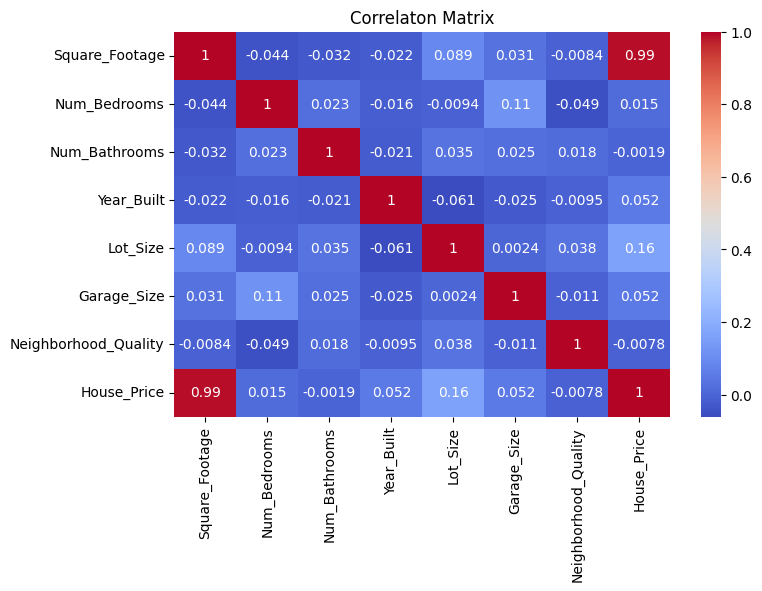

In [30]:
plt.figure(figsize=(8,5))
sns.heatmap(data.corr(numeric_only=True),annot=True,cmap='coolwarm')
plt.title("Correlaton Matrix")

Feature and Target Selecton

In [31]:
x=data[['Num_Bedrooms','Num_Bathrooms','Square_Footage','Year_Built']]
y=data['House_Price']

Train the Linear Regression Model

In [32]:
#split the data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

#Train
model=LinearRegression()
model.fit(x_train,y_train)

#predict
y_pred=model.predict(x_test)


Evaluate the model

In [33]:
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
r2=r2_score(y_test,y_pred)
print(f"Model Performance:")
print(f"Mean Absolute Error:{mae:.2f}")
print(f"Mean Squared Error:{mse:.2f}")
print(f"Root Mean Squared Error:{rmse:.2f}")
print(f"R2 Score:{r2:.3f}")

Model Performance:
Mean Absolute Error:19735.80
Mean Squared Error:546380883.40
Root Mean Squared Error:23374.79
R2 Score:0.992


Visualization

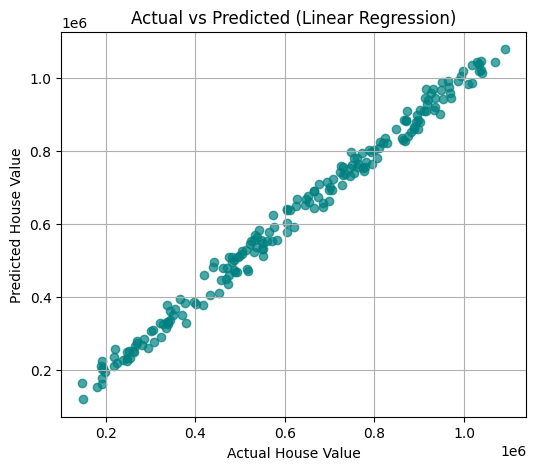

In [34]:
plt.figure(figsize=(6,5))
plt.scatter(y_test, y_pred, color='teal', alpha=0.7)
plt.xlabel("Actual House Value")
plt.ylabel("Predicted House Value")
plt.title("Actual vs Predicted (Linear Regression)")
plt.grid(True)
plt.show()

Predict a new House Price:

In [35]:
new_house=pd.DataFrame({
    'Num_Bedrooms':[3],
    'Num_Bathrooms':[4],
    'Square_Footage':[2500],
    'Year_Built':[2024]})
predicted_price=model.predict(new_house)
print(f"Predicted Price of this house is :{predicted_price[0]:.2f}")

Predicted Price of this house is :609773.84


**HOUSE VALUE PREDICTION - POLYNOMIAL REGRESSION PROJECT**

We’ll use same dataset (Home Value Insights)
and apply Polynomial Regression to see if the performance improves over the linear model.

Import Libraries

In [36]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

Build Polynomial Regression Model

In [37]:
#Split Features and Target
X = data[['Square_Footage', 'Num_Bedrooms', 'Num_Bathrooms',
        'Year_Built', 'Lot_Size', 'Garage_Size', 'Neighborhood_Quality']]
Y = data['House_Price']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

poly_model = Pipeline([('Poly_features',PolynomialFeatures(degree=2,include_bias=False)),
     ('linear_regression',LinearRegression())])
#Train the model
poly_model.fit(X_train,Y_train)

#Predict
Y_pred_poly = poly_model.predict(X_test)


Evaluate the Polynomial Model

In [38]:
mae_poly = mean_absolute_error(Y_test, Y_pred_poly)
rmse_poly = np.sqrt(mean_squared_error(Y_test, Y_pred_poly))
r2_poly = r2_score(Y_test, Y_pred_poly)

print("Polynomial Regression Performance:")
print(f"MAE: {mae_poly:.2f}")
print(f"RMSE: {rmse_poly:.2f}")
print(f"R² Score: {r2_poly:.3f}")


Polynomial Regression Performance:
MAE: 8311.02
RMSE: 10187.32
R² Score: 0.998


Compare Both Models

In [39]:
compare=pd.DataFrame({
    'model':['Linear Regression', 'Polynomial Regression'],
    'MAE':[mae, mae_poly],
    'RMSE':[rmse, rmse_poly],
    'R2 Score': [r2,r2_poly]
})
print("\n Model Comparison:")
print(compare)


 Model Comparison:
                   model           MAE          RMSE  R2 Score
0      Linear Regression  19735.797373  23374.791623  0.991524
1  Polynomial Regression   8311.015871  10187.316598  0.998390


Check whether it is Overfitting:

In [42]:
print("Train R²:", poly_model.score(X_train, Y_train))
print("Test R²:", poly_model.score(X_test, Y_test))


Train R²: 0.9985655685504481
Test R²: 0.9983899587401018


The train and test R² scores are almost identical (difference = 0.00018).

That means the model learned the true underlying patterns, not just memorized the training data.

It’s capturing subtle, non-linear relationships in  dataset without overfitting.

**polynomial regression model fits the data beautifully and generalizes extremely well — it’s both accurate and reliable.**

Visualization

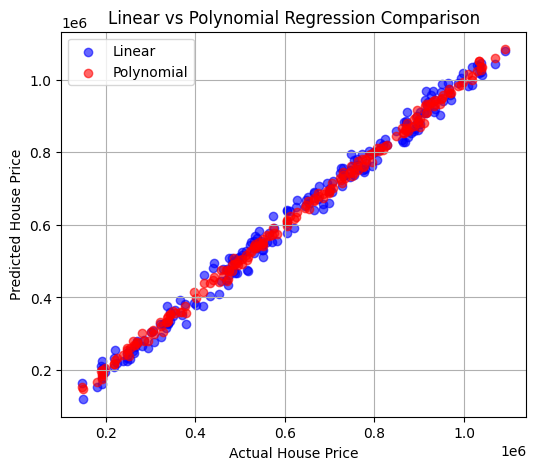

In [40]:
plt.figure(figsize=(6,5))
plt.scatter(y_test, y_pred, color='blue', label='Linear', alpha=0.6)
plt.scatter(Y_test, Y_pred_poly, color='red', label='Polynomial', alpha=0.6)
plt.xlabel("Actual House Price")
plt.ylabel("Predicted House Price")
plt.title("Linear vs Polynomial Regression Comparison")
plt.legend()
plt.grid(True)
plt.show()



**Conclusion:**
In this project, we used the Home Value Insights dataset to predict housing prices.
Both Linear and Polynomial Regression models were applied.
Polynomial Regression slightly improved the R² score from 0.991 to 0.998,
confirming a mild non-linear relationship between home features and price.
However, due to simplicity and generalization, Linear Regression remains preferred.
